In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/train_v9rqX0R (2).csv')
test = pd.read_csv('/content/test_AbJTz2l (2).csv')

In [50]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [45]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [7]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [8]:
test.isnull().sum()[test.isnull().sum()!=0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

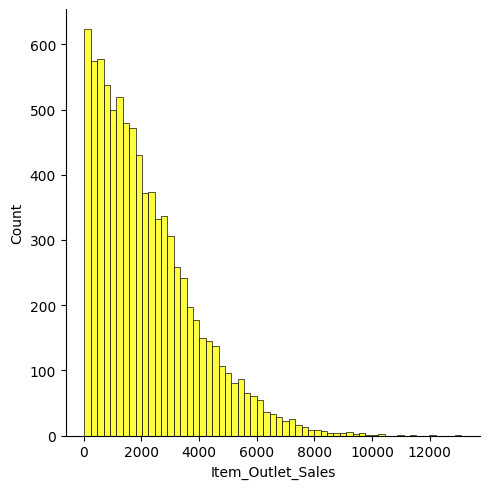

In [11]:
# Univariate Analysis
sns.displot(train.Item_Outlet_Sales, color = 'yellow')
plt.show()

In [12]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

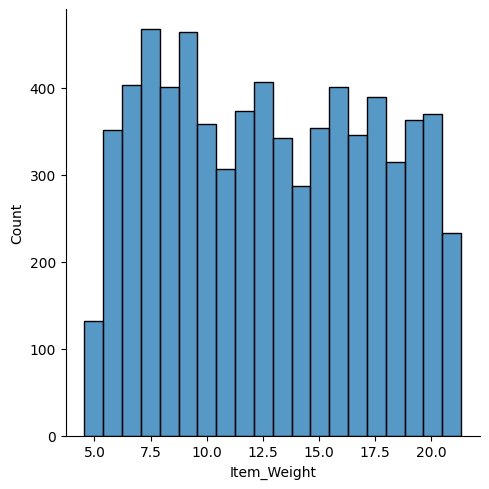

In [14]:
sns.displot(train.Item_Weight.dropna())# seaborn not compatible with missing values
plt.show()

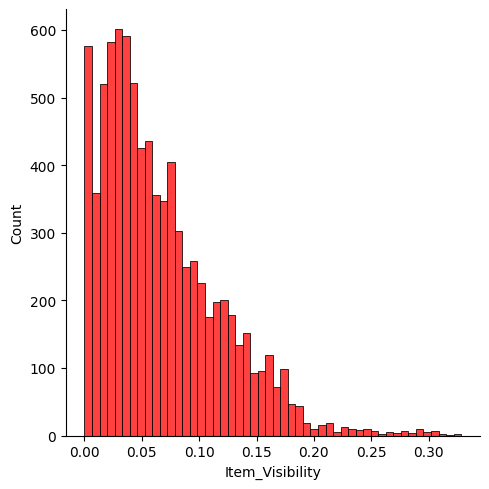

In [16]:
sns.displot(train.Item_Visibility, color = 'red')
plt.show()

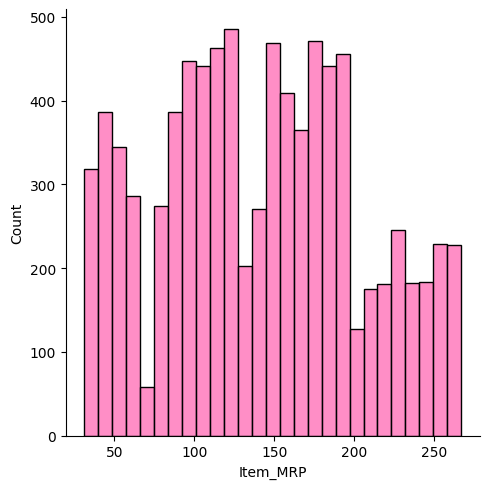

In [17]:
sns.displot(train.Item_MRP, color = 'hotpink')
plt.show()
# item-MRP has 4 different distributions, need to explore later

### Summary

1. Target Variable is skewed in nature with the average sales of 2196 dollars and a sd of 1700 and min sales of 31 dollard and     max sales of 14000 dollars.

2. Similary, Item MRP shows 04 different price distributions with min MRP as 31 dollars and max MRP as 266 dollars.

3. Item Weight has no pattern in Univ Plot

4. Item Visibility is skewed in shape meaning some products have a higher visibility in comparison to the rest.


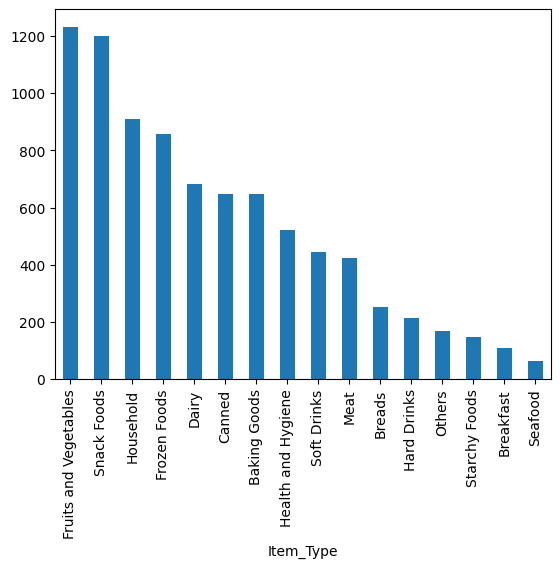

In [55]:
#Category
train.Item_Type.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 90)
plt.show()

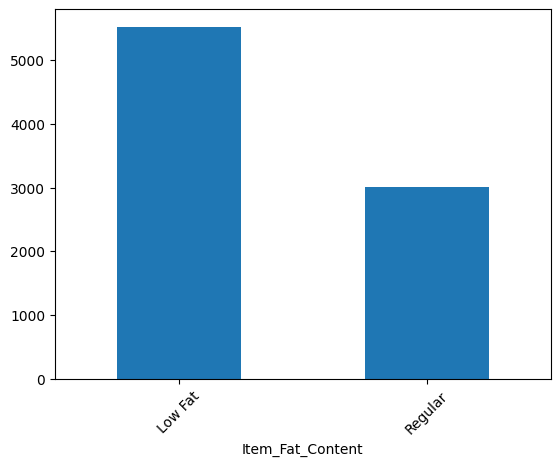

In [53]:
train.Item_Fat_Content.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show()

In [20]:
train['Item_Fat_Content'] = np.where(((train['Item_Fat_Content']=='LF')|(train['Item_Fat_Content']=='low fat')),'Low Fat',train['Item_Fat_Content'])
train['Item_Fat_Content'] = np.where((train['Item_Fat_Content']=='reg'),'Regular',train['Item_Fat_Content'])
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
## train.Item_Fat_Content.replace(to_replace = ['LF','low fat','reg'],value = ['Low Fat','Low Fat','Regular'])

In [22]:
test.Item_Fat_Content.replace(to_replace = ['LF','low fat','reg'],value = ['Low Fat','Low Fat','Regular'],inplace = True)
test.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

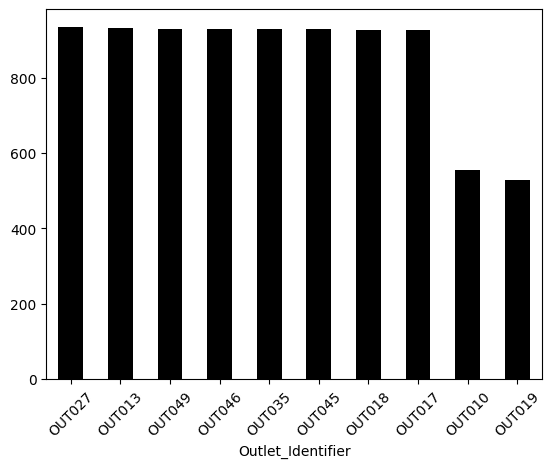

In [52]:
train.Outlet_Identifier.value_counts().plot(kind = 'bar', color="black")
plt.xticks(rotation = 45)
plt.show()

In [25]:
train.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

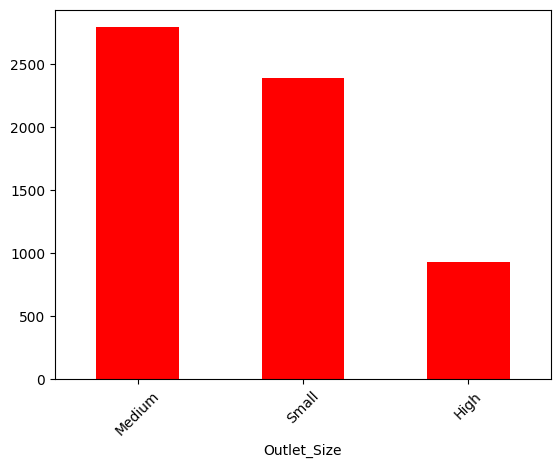

In [51]:
train.Outlet_Size.value_counts().plot(kind = 'bar', color='red')
plt.xticks(rotation = 45)
plt.show()

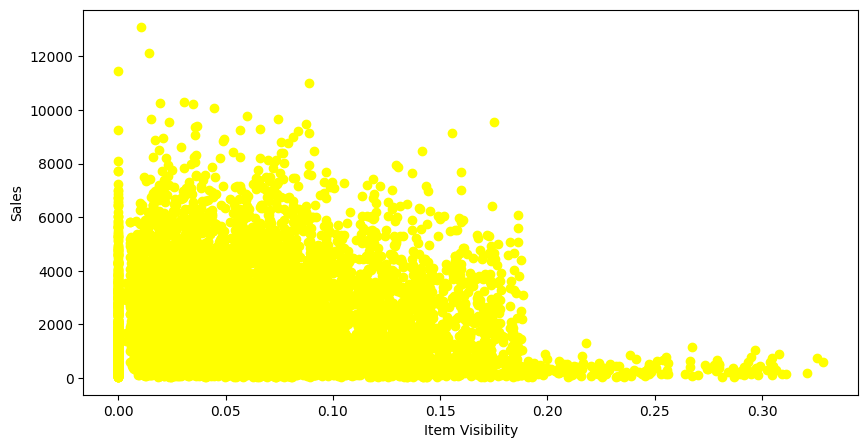

In [86]:
plt.figure(figsize = [10, 5])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "yellow")
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.show()

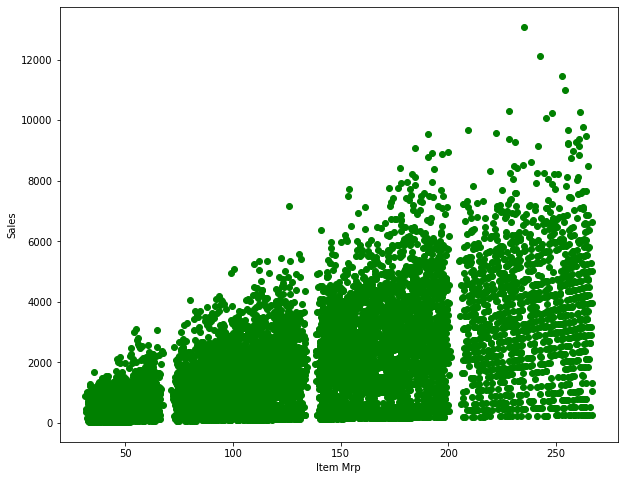

In [ ]:
plt.figure(figsize = [10,8])
plt.scatter(train.Item_MRP, train.Item_Outlet_Sales, color = 'green')
plt.xlabel('Item Mrp')
plt.ylabel('Sales')
plt.show()

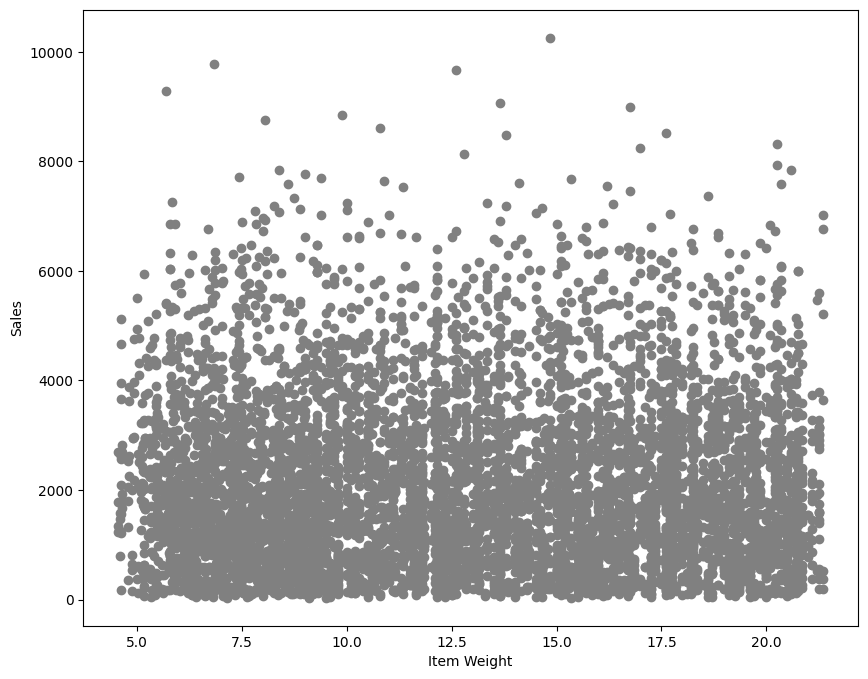

In [33]:
plt.figure(figsize = [10,8])
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, color = 'grey')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

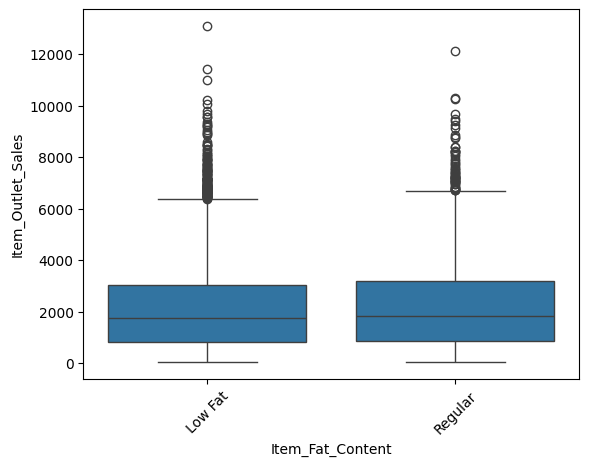

In [56]:
sns.boxplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)
plt.xticks(rotation = 45)
plt.show()

In [36]:
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


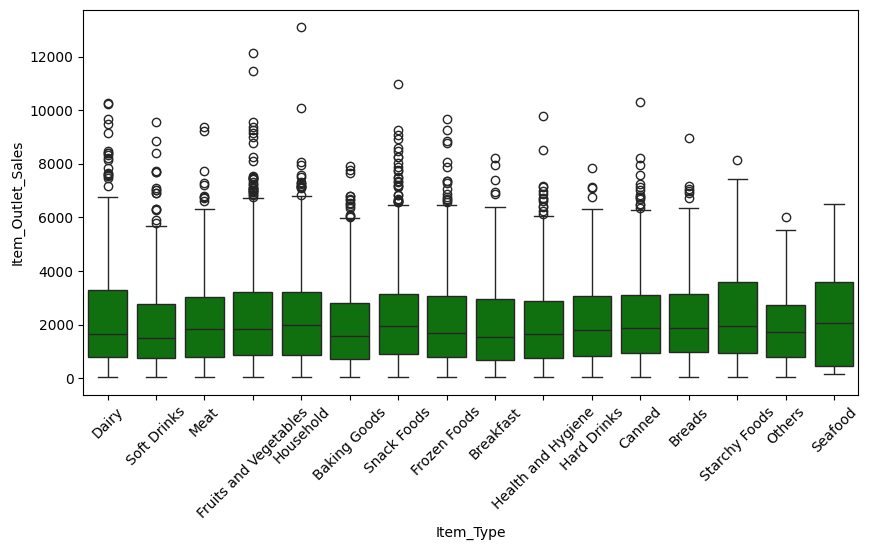

In [73]:
plt.figure(figsize = [10,5])
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales', data = train, color='green')
plt.xticks(rotation = 45)
plt.show()

In [42]:
train['Item_Type'].iloc[np.where(train['Item_Outlet_Sales']>8000)].value_counts()

Item_Type
Dairy                    11
Fruits and Vegetables    10
Snack Foods               9
Frozen Foods              5
Soft Drinks               3
Household                 3
Health and Hygiene        2
Canned                    2
Meat                      2
Starchy Foods             1
Breads                    1
Breakfast                 1
Name: count, dtype: int64

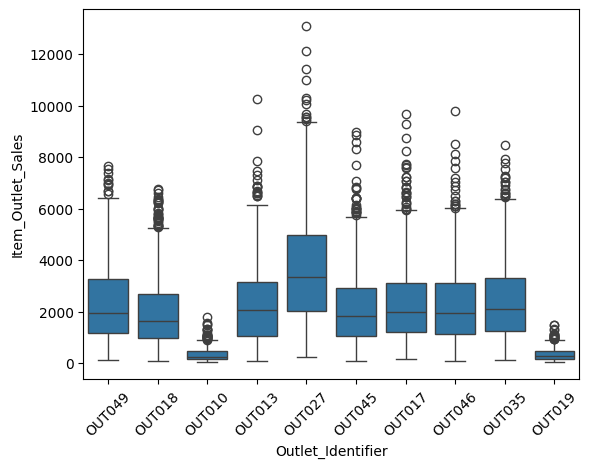

In [68]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data = train)
plt.xticks(rotation = 45)

plt.show()

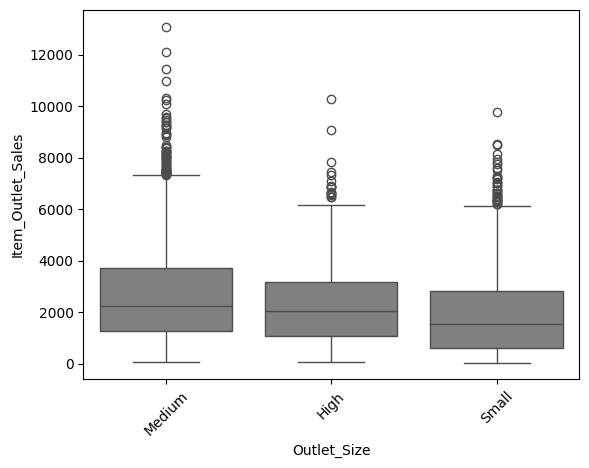

In [72]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data = train, color='grey')
plt.xticks(rotation = 45)
plt.show()

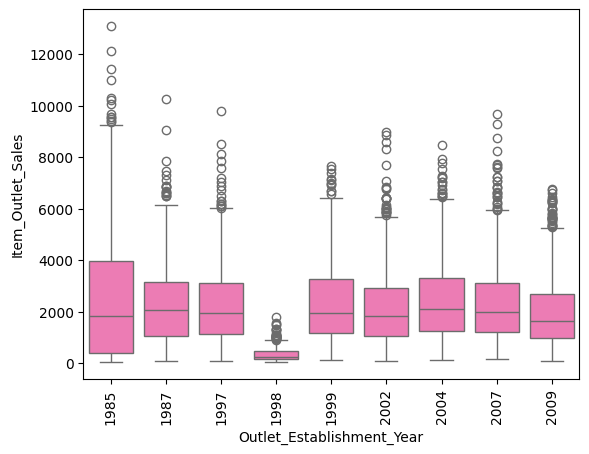

In [84]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales',data = train, color='hotpink')
plt.xticks(rotation = 90)
plt.show()

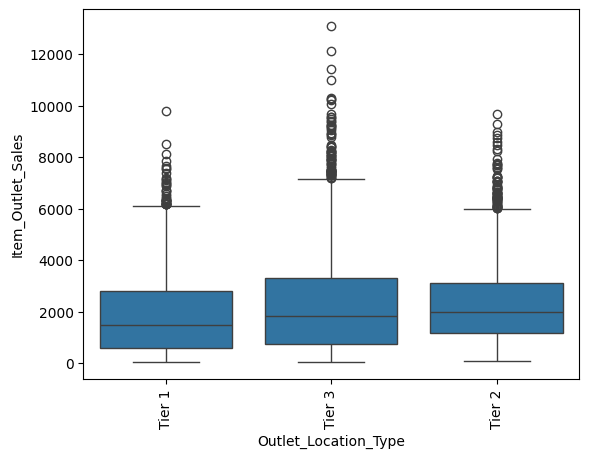

In [76]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',data = train)
plt.xticks(rotation = 90)
plt.show()

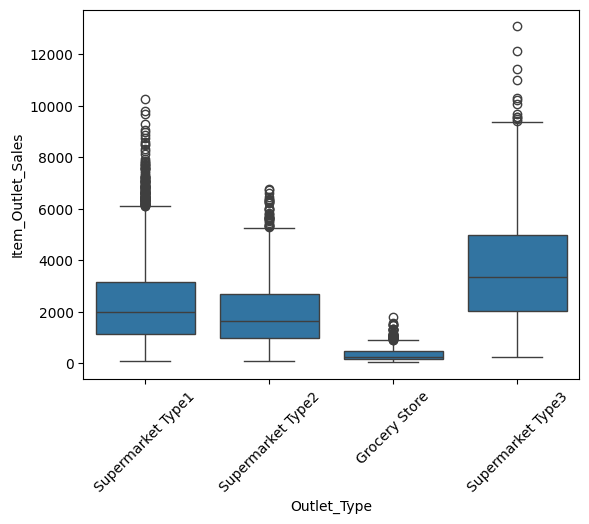

In [78]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data = train)
plt.xticks(rotation = 45)
plt.show()

### Summary of Bivariate Analysis
1. Low Fat items have higher sales than regular items
2. Sea Food has a high Mrp and low demand whereas the products made money over 8k are:
    Dairy       Fruits and Vegetables    Snack Foods              
    Frozen Foods             Household                Soft Drinks              
    Canned      Meat    Health and Hygiene       Breads   Breakfast
3.    

In [ ]:
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [87]:
train.groupby('Item_Type')['Item_Weight'].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,536.000000,204.000000,89.000000,539.000000,566.000000,718.000000,1019.000000,183.000000,430.000000,759.000000,337.000000,137.000000,51.000000,988.000000,374.000000,130.000000
mean,12.277108,11.346936,12.768202,12.305705,13.426069,12.867061,13.224769,11.400328,13.142314,13.384736,12.817344,13.853285,12.552843,12.987880,11.847460,13.690731
std,4.773622,4.440540,5.038131,4.586564,4.686532,4.507383,4.575275,4.239144,4.512313,4.998845,4.670812,4.225534,5.473830,4.531256,4.403699,4.010061
min,4.880000,4.635000,6.425000,4.615000,4.805000,4.555000,5.460000,4.610000,5.175000,5.030000,5.150000,5.500000,5.365000,5.095000,4.590000,6.695000
25%,8.235000,7.128750,8.060000,8.115000,9.277500,8.935000,9.195000,8.260000,9.695000,8.695000,9.300000,10.650000,7.420000,9.195000,8.260000,11.500000
50%,11.650000,10.600000,10.695000,12.150000,13.350000,12.850000,13.100000,10.100000,12.150000,13.150000,12.350000,14.500000,11.650000,13.150000,11.800000,13.175000
75%,15.750000,14.850000,17.250000,16.250000,17.600000,17.000000,17.100000,14.850000,17.600000,18.350000,17.200000,17.750000,17.750000,16.850000,15.350000,16.700000
max,20.850000,20.850000,21.100000,21.350000,20.700000,20.850000,21.350000,19.700000,21.250000,21.250000,21.250000,20.500000,20.750000,21.250000,20.750000,21.200000


In [88]:
train[train['Item_Identifier']=='FDA15']['Item_Weight']

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64

In [89]:
#train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

locs = train[train.Item_Weight.isnull()].index

ids = train[train.Item_Weight.isnull()]['Item_Identifier']

for i in locs:
    train.iloc[i,1] = train.loc[train.Item_Identifier==ids[i], 'Item_Weight'].mean()

In [90]:
locs = test[test.Item_Weight.isnull()].index

ids = test[test.Item_Weight.isnull()]['Item_Identifier']

for i in locs:
    test.iloc[i,1] = test.loc[test.Item_Identifier==ids[i], 'Item_Weight'].mean()

In [91]:
print(test.isnull().sum()) ; print(train.isnull().sum())

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [92]:
types = test[test.Item_Weight.isnull()]['Item_Type'].unique()

for i in types:
    test.loc[test.Item_Type == i, 'Item_Weight'] = (test.loc[test.Item_Type == i, 'Item_Weight'].
                                                    fillna(test.loc[test.Item_Type == i, 'Item_Weight'].mean()))

In [93]:
types = train[train.Item_Weight.isnull()]['Item_Type'].unique()

for i in types:
    train.loc[train.Item_Type == i, 'Item_Weight'] = (train.loc[train.Item_Type == i, 'Item_Weight'].
                                                    fillna(train.loc[train.Item_Type == i, 'Item_Weight'].mean()))

In [94]:
train[train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [95]:
test[test['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [96]:
test.iloc[7]

Item_Identifier                          FDC48
Item_Weight                              9.195
Item_Fat_Content                       Low Fat
Item_Visibility                       0.015782
Item_Type                         Baking Goods
Item_MRP                               81.0592
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Name: 7, dtype: object

In [97]:
# Row # 4, Col#1, test.iloc[4,1] = test.loc[test.Item_Identifier=="FDY38", "Item_Weight"].mean()

# Location Nos/Row Index Nos
# ITem ID.

# Item IDs
ids = test[test.Item_Weight.isnull()]["Item_Identifier"]

# List of all the rows where Item Weight is Missing
indexnos = test[test.Item_Weight.isnull()].index

#test.iloc[4,1] = test.loc[test.Item_Identifier=="FDY38", "Item_Weight"].mean()

for i in indexnos:
    test.iloc[i,1] = test.loc[test.Item_Identifier==ids[i], "Item_Weight"].mean()


In [98]:
newitems = test[test.Item_Weight.isnull()]["Item_Type"]

# List of all the rows where Item Weight is Missing
newid = test[test.Item_Weight.isnull()].index

In [99]:
for i in newid:
    test.iloc[i,1] = test.loc[test.Item_Type==newitems[i], "Item_Weight"].mean()

In [100]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [101]:
newitems = train[train.Item_Weight.isnull()]["Item_Type"]

# List of all the rows where Item Weight is Missing
newid = train[train.Item_Weight.isnull()].index

for i in newid:
    train.iloc[i,1] = train.loc[train.Item_Type==newitems[i], "Item_Weight"].mean()

In [102]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [103]:
train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [104]:
train.loc[np.where(train['Outlet_Size'].isnull()==True)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [105]:
train.groupby(train['Outlet_Establishment_Year'])['Outlet_Size'].value_counts()

Outlet_Establishment_Year  Outlet_Size
1985                       Medium         935
                           Small          528
1987                       High           932
1997                       Small          930
1999                       Medium         930
2004                       Small          930
2009                       Medium         928
Name: count, dtype: int64

In [106]:
train.groupby([train['Outlet_Identifier'],train['Outlet_Establishment_Year']])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size
OUT013             1987                       High           932
OUT018             2009                       Medium         928
OUT019             1985                       Small          528
OUT027             1985                       Medium         935
OUT035             2004                       Small          930
OUT046             1997                       Small          930
OUT049             1999                       Medium         930
Name: count, dtype: int64

In [107]:
pd.DataFrame(train.groupby(["Outlet_Size",
                            "Outlet_Location_Type"])["Outlet_Type"].value_counts())

count
Outlet_Size Outlet_Location_Type Outlet_Type             
High        Tier 3               Supermarket Type1    932
Medium      Tier 1               Supermarket Type1    930
            Tier 3               Supermarket Type3    935
                                 Supermarket Type2    928
Small       Tier 1               Supermarket Type1    930
                                 Grocery Store        528
            Tier 2               Supermarket Type1    930

In [108]:
pd.DataFrame(train.groupby(["Outlet_Size",
                            "Outlet_Location_Type"])["Outlet_Type"].value_counts()).T

Outlet_Size                       High            Medium                    \
Outlet_Location_Type            Tier 3            Tier 1            Tier 3   
Outlet_Type          Supermarket Type1 Supermarket Type1 Supermarket Type3   
count                              932               930               935   

Outlet_Size                                        Small                \
Outlet_Location_Type                              Tier 1                 
Outlet_Type          Supermarket Type2 Supermarket Type1 Grocery Store   
count                              928               930           528   

Outlet_Size                             
Outlet_Location_Type            Tier 2  
Outlet_Type          Supermarket Type1  
count                              930

In [112]:
train.corr()

ValueError: could not convert string to float: 'FDA15'

In [113]:
outlets = train.loc[train['Outlet_Size'].isnull()]

In [114]:
pd.DataFrame(outlets.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts())

,,count
Outlet_Location_Type,Outlet_Type,
Tier 2,Supermarket Type1,1855
Tier 3,Grocery Store,555


In [115]:
train.loc[train.Outlet_Size.isnull(),'Outlet_Size'] = 'Small'

In [116]:
pd.DataFrame(test.groupby(["Outlet_Size","Outlet_Location_Type"])["Outlet_Type"].value_counts()).T

Outlet_Size                       High            Medium                    \
Outlet_Location_Type            Tier 3            Tier 1            Tier 3   
Outlet_Type          Supermarket Type1 Supermarket Type1 Supermarket Type3   
count                              621               620               624   

Outlet_Size                                        Small                \
Outlet_Location_Type                              Tier 1                 
Outlet_Type          Supermarket Type2 Supermarket Type1 Grocery Store   
count                              618               620           352   

Outlet_Size                             
Outlet_Location_Type            Tier 2  
Outlet_Type          Supermarket Type1  
count                              620

In [117]:
outlets = test.loc[test['Outlet_Size'].isnull()]

In [118]:
pd.DataFrame(outlets.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts())

,,count
Outlet_Location_Type,Outlet_Type,
Tier 2,Supermarket Type1,1236
Tier 3,Grocery Store,370


In [119]:
test.loc[test.Outlet_Size.isnull(),'Outlet_Size'] = 'Small'

In [120]:
train['Item_Visibility'] = (train.groupby('Item_Identifier')['Item_Visibility'].
                           transform(lambda x:x.replace(to_replace = 0, value = x.mean())))

In [121]:
test['Item_Visibility'] = (test.groupby('Item_Identifier')['Item_Visibility'].
                           transform(lambda x:x.replace(to_replace = 0, value = x.mean())))

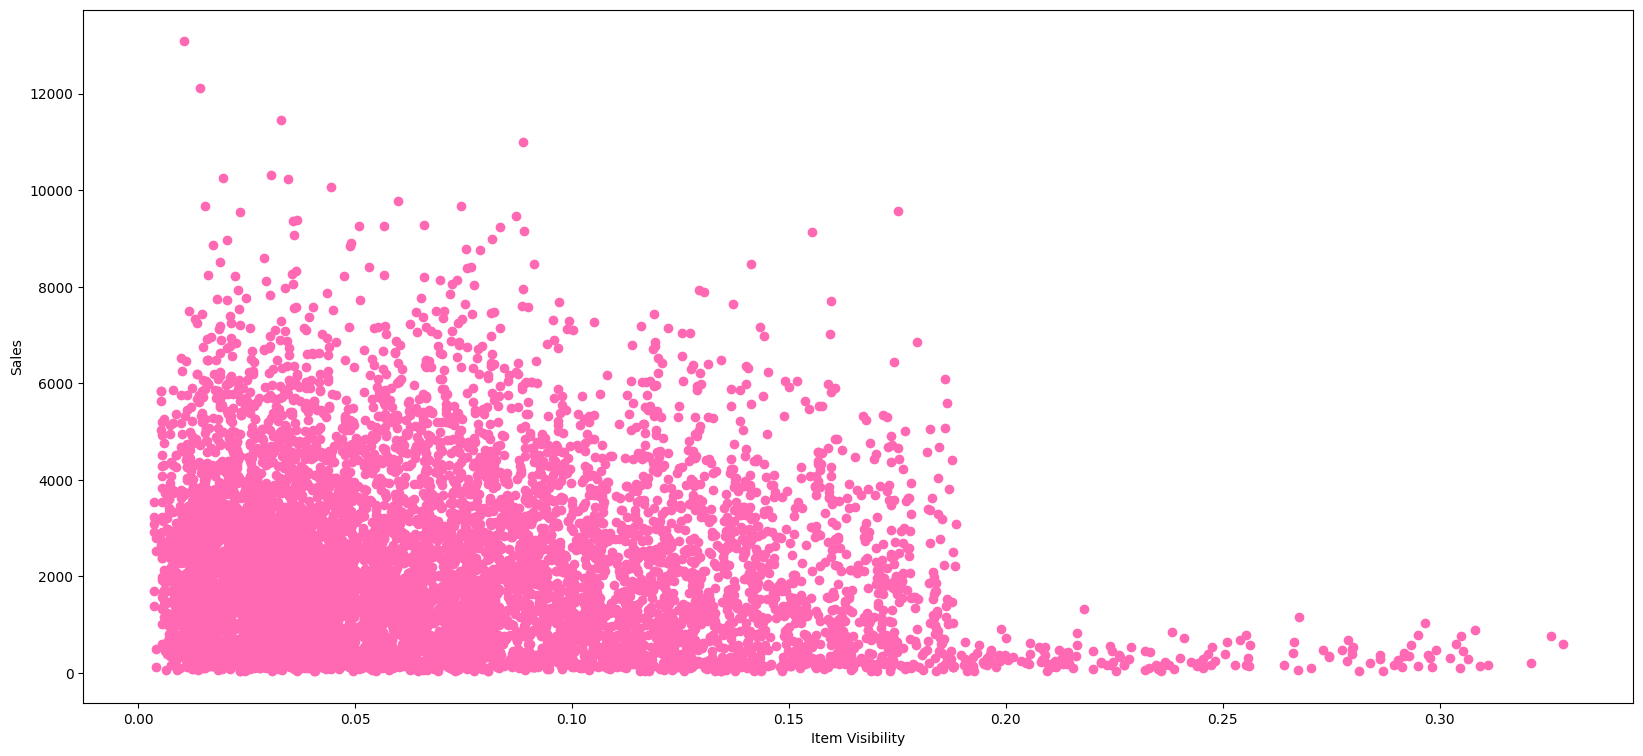

In [124]:
# Item Visibility Vs Sales
plt.figure(figsize = [20, 9])
plt.scatter(train.Item_Visibility, train.Item_Outlet_Sales, color = "hotpink")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

### Feature Engineering

In [125]:
train['Outlet_Age'] = 2013-train.Outlet_Establishment_Year
test['Outlet_Age'] = 2013-test.Outlet_Establishment_Year

In [126]:
def outlets(x):
    if(x=="OUT027"):
        return("OUT027")
    else:
        return("Others")

train["Outlet_Cat"] = train.Outlet_Identifier.apply(outlets)

test["Outlet_Cat"] = test.Outlet_Identifier.apply(outlets)

In [127]:
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [128]:
perishables = ['Fruits and Vegetables','Dairy','Breakfast','Seafood','Breads','Meat']

In [129]:
def perish(x):
    if x in perishables:
        return('perishables')
    else:
        return('non perishables')

In [130]:
train['Item_Category'] = train.Item_Type.apply(perish)

test['Item_Category'] = test.Item_Type.apply(perish)

In [131]:
ids = []

for i in train['Item_Identifier']:
    ids.append(i[:2])

train['Item_ID'] = pd.Series(ids)

In [132]:
ids = []

for i in test['Item_Identifier']:
    ids.append(i[:2])

test['Item_ID'] = pd.Series(ids)

In [133]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [134]:
# Price Per Unit/Item

train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight

test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [135]:
test.loc[test.Item_ID=="NC", "Item_Fat_Content"]="Non Edible"

train.loc[train.Item_ID=="NC", "Item_Fat_Content"]="Non Edible"

In [136]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age', 'Outlet_Cat',
       'Item_Category', 'Item_ID', 'Price_Per_Unit'],
      dtype='object')

In [137]:
# drop the Extra columns
newtrain = train.drop(columns = ['Item_Identifier', "Item_Type", "Outlet_Identifier",
                       "Outlet_Establishment_Year"])


newtest = test.drop(columns = ['Item_Identifier', "Item_Type", "Outlet_Identifier",
                       "Outlet_Establishment_Year"])

In [138]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Cat,Item_Category,Item_ID,Price_Per_Unit
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,Others,perishables,FD,26.861204
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Others,non perishables,DR,8.153581
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,Others,perishables,FD,8.092457
3,19.20,Regular,0.015274,182.0950,Small,Tier 3,Grocery Store,732.3800,15,Others,perishables,FD,9.484115
4,8.93,Non Edible,0.008082,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Others,non perishables,NC,6.031512


In [139]:
np.corrcoef(train.Price_Per_Unit, train.Item_Outlet_Sales)

array([[1.        , 0.38345671],
       [0.38345671, 1.        ]])

In [140]:
np.cov(train.Price_Per_Unit, train.Item_Outlet_Sales)

array([[6.44166115e+01, 5.25196080e+03],
       [5.25196080e+03, 2.91214094e+06]])

### Statistical

In [141]:
import scipy.stats as ss

In [142]:
# Price Per Unit Vs Item Outlet Sales
ss.ttest_rel(newtrain.Price_Per_Unit, newtrain.Item_Outlet_Sales)

TtestResult(statistic=-117.5285386964518, pvalue=0.0, df=8522)

In [143]:
# Inf: That the Mean(Price Per Unit) & Mean(TV) is not same. Its different.
# Whether the Item Fat Content and Item Category are Independent of Each Other
# Or have some relation.

# Ho: That the Categories are Independent of each other meaning happening of one event does
# not have an impact on the other.

# H1: Ho is False.

# Frequency Table
array = pd.crosstab(newtrain.Item_Fat_Content, newtrain.Item_Category)

# Apply Chi Square - chi2_Contingency
teststats, pvalue, dof, exp_freq = ss.chi2_contingency(array)

print(pvalue)
print(exp_freq)

2.0907969684852738e-215
[[2647.39669131 1270.60330869]
 [1080.44596973  518.55403027]
 [2031.15733897  974.84266103]]


In [144]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("Item_Outlet_Sales~Item_Fat_Content+Outlet_Size+Outlet_Location_Type+Outlet_Type+Outlet_Cat+Item_Category+Item_ID",
           data = newtrain).fit()

In [145]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,2.0,9.201502e+06,4.600751e+06,2.079813,1.250171e-01
Outlet_Size,2.0,1.184389e+09,5.921943e+08,267.707036,1.765295e-113
Outlet_Location_Type,2.0,1.419529e+09,7.097646e+08,320.855807,4.542759e-135
Outlet_Type,3.0,3.343020e+09,1.114340e+09,503.747874,2.412547e-301
Outlet_Cat,1.0,1.925818e+06,1.925818e+06,0.870584,3.508201e-01
Item_Category,1.0,1.731050e+07,1.731050e+07,7.825377,5.163340e-03
Item_ID,2.0,2.146152e+07,1.073076e+07,4.850942,7.842645e-03
Residual,8511.0,1.882717e+10,2.212098e+06,NaN,NaN


In [146]:
anova_table['PR(>F)'][:-1]<0.05
# Remove Item_Fat_Content, Outlet_Cat

Item_Fat_Content        False
Outlet_Size              True
Outlet_Location_Type     True
Outlet_Type              True
Outlet_Cat              False
Item_Category            True
Item_ID                  True
Name: PR(>F), dtype: bool

In [147]:
model = ols("Item_Outlet_Sales~Item_Weight+Price_Per_Unit+Item_MRP",
           data = newtrain).fit()

anova_tbl = sm.stats.anova_lm(model)
anova_tbl["PR(>F)"][:-1]<0.05 # Remove Item Weight

Item_Weight       False
Price_Per_Unit     True
Item_MRP           True
Name: PR(>F), dtype: bool

In [148]:
finaltrain = newtrain.drop(columns = ['Item_Fat_Content','Item_Weight','Outlet_Cat'])
finaltest = newtest.drop(columns = ['Item_Fat_Content','Item_Weight','Outlet_Cat'])

In [149]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Visibility       8523 non-null   float64
 1   Item_MRP              8523 non-null   float64
 2   Outlet_Size           8523 non-null   object 
 3   Outlet_Location_Type  8523 non-null   object 
 4   Outlet_Type           8523 non-null   object 
 5   Item_Outlet_Sales     8523 non-null   float64
 6   Outlet_Age            8523 non-null   int64  
 7   Item_Category         8523 non-null   object 
 8   Item_ID               8523 non-null   object 
 9   Price_Per_Unit        8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [150]:
dummytrain = pd.get_dummies(finaltrain)
dummytest = pd.get_dummies(finaltest)

In [151]:
dummytrain.shape , dummytest.shape

((8523, 20), (5681, 19))

In [152]:
dummytrain.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Price_Per_Unit,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_non perishables,Item_Category_perishables,Item_ID_DR,Item_ID_FD,Item_ID_NC
0,0.016047,249.8092,3735.1380,14,26.861204,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False
1,0.019278,48.2692,443.4228,4,8.153581,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False
2,0.016760,141.6180,2097.2700,14,8.092457,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False
3,0.015274,182.0950,732.3800,15,9.484115,False,False,True,False,False,True,True,False,False,False,False,True,False,True,False
4,0.008082,53.8614,994.7052,26,6.031512,True,False,False,False,False,True,False,True,False,False,True,False,False,False,True


In [153]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier
                         ,'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})

In [154]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [155]:
solution.to_csv('basemodel.csv',index = False) # 1773.8251377790564.

In [156]:
from sklearn.tree import DecisionTreeRegressor

In [157]:
# Fit the Model on the Data and predict it
dtree = DecisionTreeRegressor(random_state = 25)

# Defined the Xtrain and YTrain
x = dummytrain.drop("Item_Outlet_Sales", axis = 1)
y = dummytrain.Item_Outlet_Sales

# Fit and Predict
pred = dtree.fit(x,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("treebased.csv", index = False) # 1569.46102146263. # 1581.5801150427292. # 1589.9860774670133

In [158]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [159]:
def stackedmodels():
    models = dict()
    models["LR"] = LinearRegression()
    models["Lasso"] = Lasso(random_state = 25)
    models["Ridge"] = Ridge(random_state = 25)
    models["Tree"] = DecisionTreeRegressor(random_state = 25)
    models["RF"] = RandomForestRegressor(random_state = 25)
    models["Bagg"] = BaggingRegressor(random_state = 25)
    models["GBR"] = GradientBoostingRegressor(random_state = 25)
    models["XGB"] = XGBRegressor(random_state = 25)
    return(models)

In [160]:
# Time to Create the Cross Validation
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Note: Cross val score for Reg generates -ve value: -neg abolsute erro

def eval_models(model):
    cross_v= RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores = -cross_val_score(model, x, y, scoring = "neg_mean_absolute_error",
                            cv = cross_v, error_score="raise", n_jobs = -1)
    return(scores)

In [161]:
# Apply Loop so that scores can be generated for all the Models

models = stackedmodels()

# Evaluations
result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model) # Evaluation Funct that we have created
    result.append(scores) # Save the Cross Val Score
    names.append(name) # Save the Name of the Model
    print(">%s %3.f (%.3f)" % (name, scores.mean(), scores.std()))

>LR 838 (27.128)
>Lasso 838 (26.910)
>Ridge 838 (27.091)
>Tree 1060 (40.669)
>RF 794 (29.531)
>Bagg 821 (28.122)
>GBR 759 (25.929)
>XGB 822 (30.347)


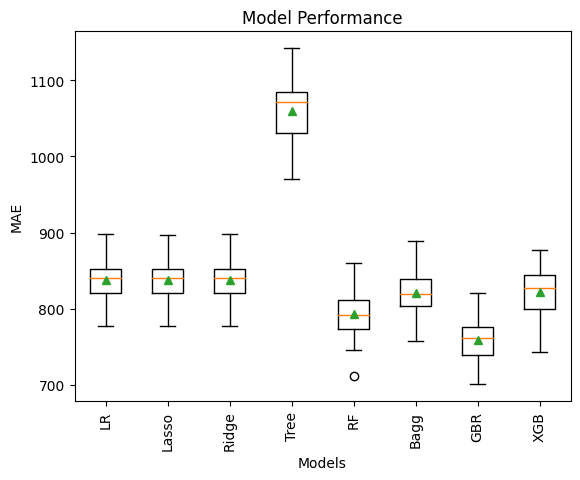

In [162]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("MAE")
plt.xlabel("Models")
plt.title("Model Performance")
plt.show()

In [163]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit the Model on the Data and predict it
GBR = GradientBoostingRegressor(random_state = 25)

# Fit and Predict
pred = GBR.fit(x,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("gbrbased.csv", index = False) # 1155.4065050570398.

In [164]:
from xgboost.sklearn import XGBRegressor

# Fit the Model on the Data and predict it
XGB = XGBRegressor(random_state = 25)

# Fit and Predict
pred = XGB.fit(x,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("xgbbased.csv", index = False) # negative

In [165]:
from sklearn.ensemble import RandomForestRegressor

# Fit the Model on the Data and predict it
RF = RandomForestRegressor(random_state = 25)

# Fit and Predict
pred = RF.fit(x,y).predict(dummytest)

# Export for submission

solution = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                        "Outlet_Identifier": test.Outlet_Identifier,
                        "Item_Outlet_Sales": pred})

# Export it in csv
solution.to_csv("rfbased.csv", index = False) # 1210.8205684842346.# 1224.027416310273.